In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [96]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [97]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [98]:
df.shape

(13320, 9)

In [99]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [100]:
df2 = df.drop(columns=['area_type', 'availability', 'society', 'balcony'])

In [101]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [102]:
df2.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [103]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [104]:
df3 = df2.dropna()

In [105]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [106]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [107]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/Users/raktimbarua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [109]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [110]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [111]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [112]:
def convert_sqrt_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return True

In [113]:
convert_sqrt_to_num('21666')

21666.0

In [114]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqrt_to_num)

In [115]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


## Feature Engineering

In [116]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5['price_per_sqft'] = pd.to_numeric(df5['price_per_sqft'],errors='coerce')

In [117]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,4250.000000


In [118]:
len(df5.location.unique())

1304

In [119]:
df5.location = df5.location.apply(lambda x: x.strip())

In [120]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [121]:
len(location_stats[location_stats<=10])

1052

In [122]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [123]:
len(df5.location.unique())

1293

In [124]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [125]:
len(df5.location.unique())

242

### Outlier Removal

In [126]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020,6.0,370.00,6,36274.509804


In [127]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500,3.0,100.0,3,20000.000000


In [128]:
df5.shape

(13246, 7)

In [129]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [130]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,4250.000000


In [131]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [132]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft>(m-s)) & (subdf.price_per_sqft<=(m+s))]
        df_out = pd.concat([df_out, reduce_df],ignore_index=True)
    return df_out

In [133]:
df7 = remove_pps_outliers(df6)

In [134]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235,2.0,148.0,2,11983.805668


In [135]:
df7.shape

(10241, 7)

## Data Visualization

In [144]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total square feet area')
    plt.ylabel('Price')
    plt.legend()



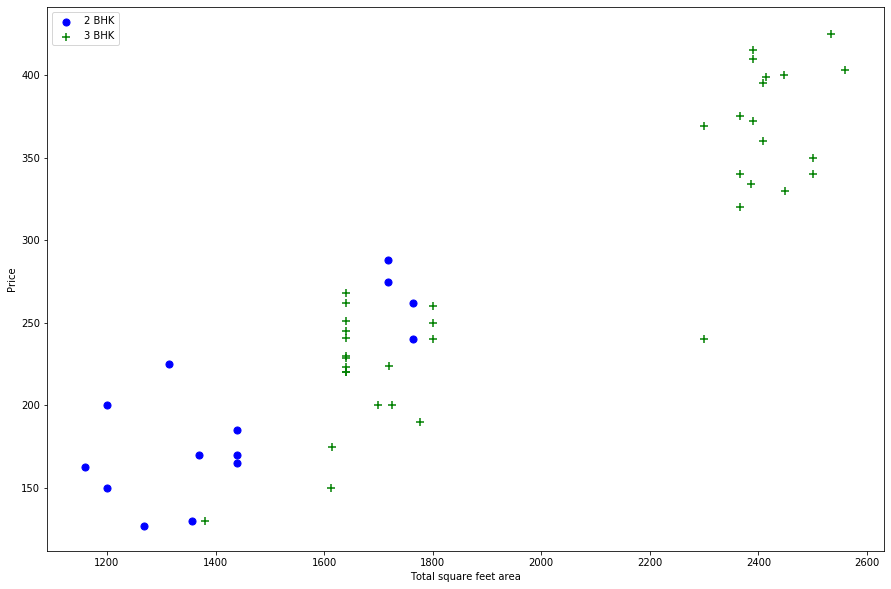

In [145]:
plot_scatter_chart(df7, 'Rajaji Nagar')

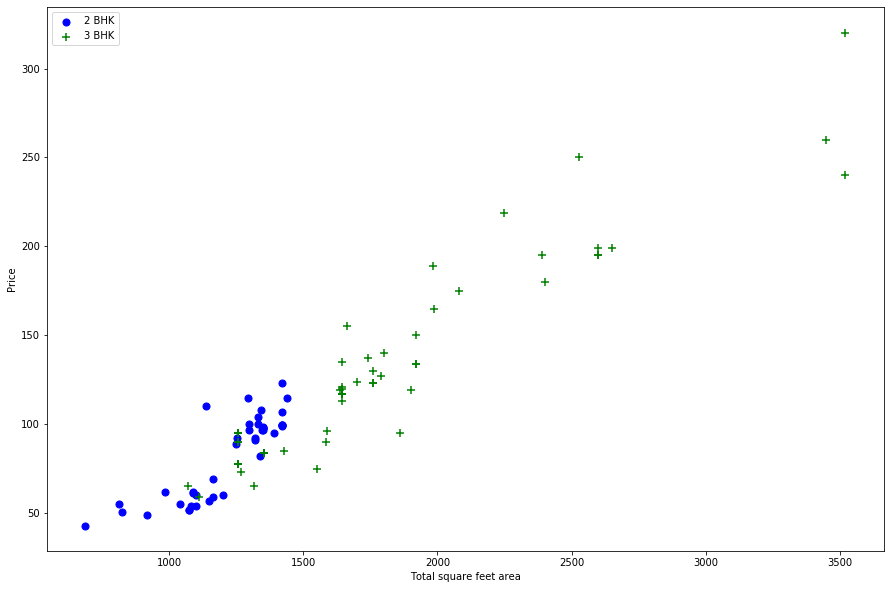

In [155]:
plot_scatter_chart(df7, 'Hebbal')

We should also remove properties where for same location, the price of (for instance) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we build a dictionary of stats per bhk i.e.
``` 
{
    '1': {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    
} 
 ```
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [148]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [150]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

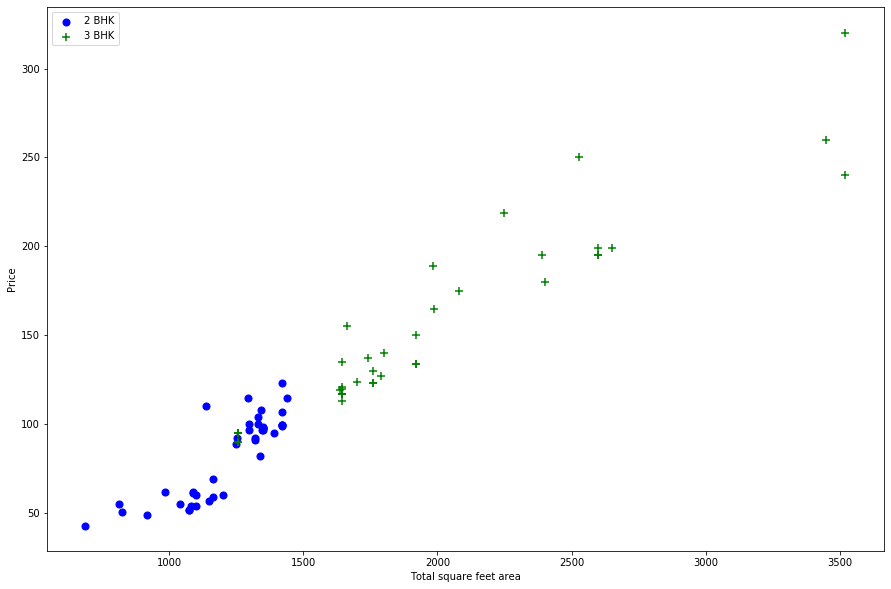

In [153]:
plot_scatter_chart(df8, 'Hebbal')

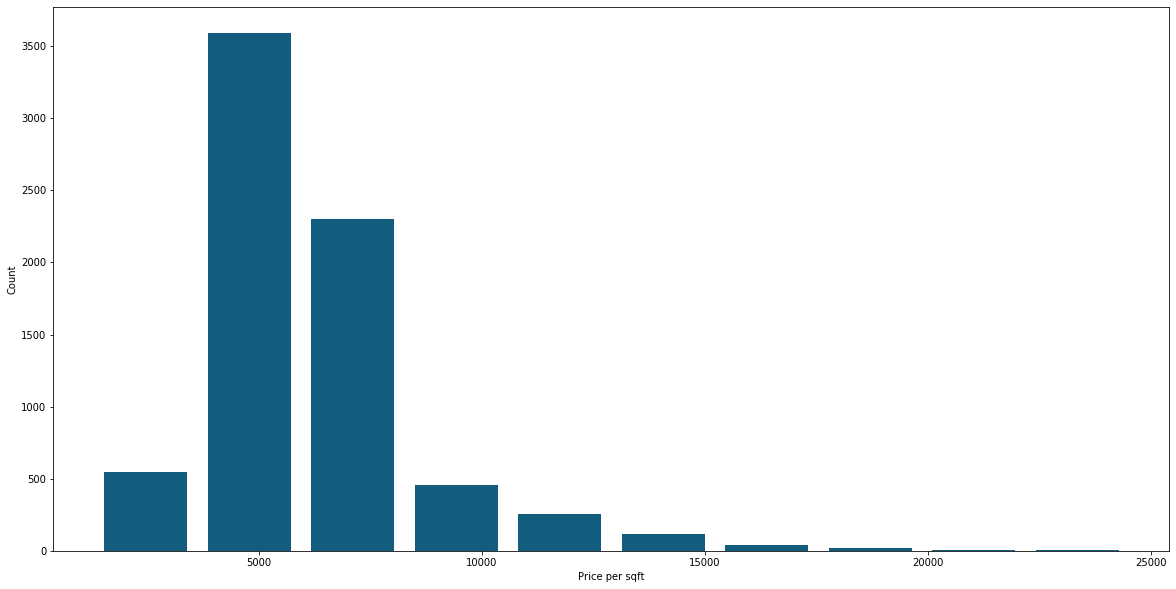

In [161]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8.price_per_sqft, rwidth=0.8, color='#125D7D')
plt.xlabel("Price per sqft")
plt.ylabel("Count")
plt.show()

In [162]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [163]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425,13.0,275.0,13,5069.124424


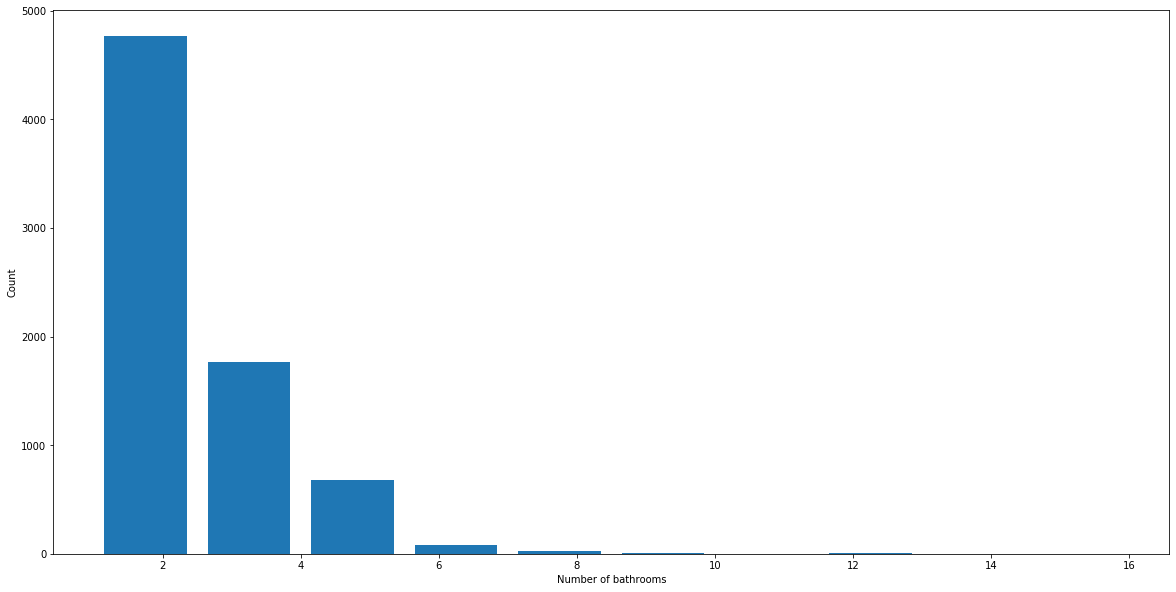

In [168]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [171]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [173]:
df10 = df9.drop(columns=['size', 'price_per_sqft'])

In [175]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850,4.0,428.0,4
1,1st Block Jayanagar,1630,3.0,194.0,3
2,1st Block Jayanagar,1875,2.0,235.0,3
3,1st Block Jayanagar,1200,2.0,130.0,3
4,1st Block Jayanagar,1235,2.0,148.0,2


## Model Building

In [177]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
df11 = pd.concat([df10.drop(columns=['location']), dummies.drop(columns=['other'])],axis='columns')

In [182]:
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
df11.shape

(7251, 245)

In [229]:
x = df11.drop('price', axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=10)

In [232]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [233]:
lr.score(X_test, y_test)

0.8452277697874312

In [234]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cross_val_score(lr, x,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286,
       0.77463657, 0.84724578, 0.84813854, 0.84493306, 0.85893313])

In [235]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [236]:
def find_best_model_using_gridsearch(x,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best','random']
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [237]:
result = find_best_model_using_gridsearch(x,y)

In [238]:
result

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.721756,"{'criterion': 'mse', 'splitter': 'best'}"


In [239]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [240]:
np.where(x.columns == '1st Phase JP Nagar')[0][0]

4

## Predict Price

In [241]:
def predict_price(location,sqft,bath,bhk):
    location_index = np.where(x.columns==location)[0][0]
    
    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if location_index >= 0:
        X[location_index] = 1
        
    return lr.predict([X])[0]

In [242]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.49904677179231

In [245]:
import pickle
with open('bangaluru_house_price_prediction.pickle', 'wb') as f:
    pickle.dump(lr,f)

In [247]:
import json
columns = {
    'data_columns': [col.lower() for col in x.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))